In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def pred_output(X, params):
    # print X[:10]
    # print params
    # print '----------------------'
    y = [0 for px in range(X.shape[0])]
    for ex in range(X.shape[0]):
        for ix in range(X.shape[1]):
            y[ex] += params[ix]*X[ex, ix]
    
    return np.asarray(y)

def objective_loss(y_true, X, params):
    y_pred = pred_output(X, params)
    L = 0.0
    for ix in range(y_pred.shape[0]):
        L += (y_true[ix] - y_pred[ix])**2
    L = L/(2*len(y_pred))
    # print L
    return L

def loss_wrt_grad(X, params, y_true):
    y_pred = pred_output(X, params)
    dL = [0.0 for dw in range(params.shape[0])]
    # print X[:10]
    for lx in range(len(dL)):
        err_sum = 0.0
        for ix in range(y_pred.shape[0]):
            err_sum += (y_pred[ix] - y_true[ix]) * X[ix, lx]
        dL[lx] = err_sum/y_pred.shape[0]
        # print err_sum
    # print dL, "DLOSS"
    return np.asarray(dL)

def grad_desc(X, params, y_true, alpha=0.01):
    dL = alpha*loss_wrt_grad(X, params, y_true)
    # print dL.shape
    # print dL
    for px in range(params.shape[0]):
        params[px] = params[px] - dL[px]
    return np.asarray(params)

def run_gradient_descent(X_train, y_train, epochs=10, alpha=0.01):
    params = np.zeros((X_train.shape[1] + 1,)) + 0.1
    X = np.zeros((X_train.shape[0], X_train.shape[1]+1))
    
    X[:, 0] = 1.0
    X[:, 1:] = X_train
    
    loss_history = []
    
    initial_loss = objective_loss(y_train, X, params)
    loss_history.append(initial_loss)
    param_history = []
    for epx in range(epochs):
        params = grad_desc(X, params, y_train, alpha)
        param_history.append(params)
        loss_history.append(objective_loss(y_train, X, params))
    
    return params, loss_history

In [5]:
a = """4
390
9
580
10
650
14
730
4
410
7
530
12
600
22
790
1
350
3
400
8
590
11
640
5
450
6
520
10
690
11
690
16
770
13
700
13
730
10
640"""

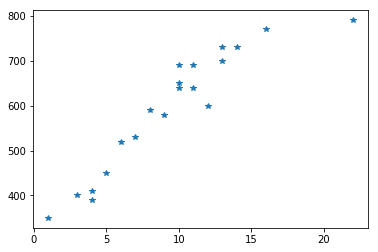

In [6]:
d = a.split('\n')
x = d[0::2]
y = d[1::2]
X = np.zeros((len(x), 1))
y = np.zeros((len(y),))

for ix in range(len(x)):
    X[ix, :] = int(x[ix])
    y[ix] = int(d[1::2][ix])

plt.plot(X[:, 0], y, '*')

[  6.70642429  52.92176892] 13748.8333083


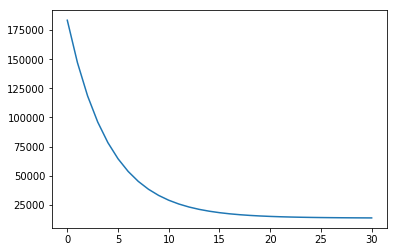

In [7]:

z = run_gradient_descent(X, y, epochs=30, alpha=0.001)
print z[0], z[1][-1]
plt.plot(z[1])

In [8]:
p = z[0]
k = np.hstack([np.ones((X.shape)), X])
pp = (k*p).sum(axis=1)
print np.sum((y-pp)**2)/(2*y.shape[0])

13748.8333083
